### Step

Perlukah Data test nya di WOE dan binning?

1. Modeling with logreg
    - baseline
    - logreg
    - hyperparams
2. Model Evaluation with:
    - AUCROC
    - Gini
    - K-S
3. Get weights and convert into final score

In [40]:
from src.helper import load_pickle, dump_pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data 

In [41]:
dataset = load_pickle("data/processed/final_train_v3.pkl")

dataset.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,TARGET,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,...,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m
185640,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
266989,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
37682,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
280087,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
255967,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [42]:
test_set = load_pickle("data/processed/final_test_v3.pkl")

test_set.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,TARGET,AMT_INCOME_TOTAL_0_100k,AMT_INCOME_TOTAL_100k_150k,AMT_INCOME_TOTAL_150k_200k,...,AMT_CREDIT_800k_1m,AMT_CREDIT_1m,AMT_ANNUITY_20k,AMT_ANNUITY_30k,AMT_ANNUITY_46k,AMT_ANNUITY_50k,AMT_GOODS_PRICE_300k,AMT_GOODS_PRICE_600k,AMT_GOODS_PRICE_900k,AMT_GOODS_PRICE_1m
54382,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
252585,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
181435,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
116552,1.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
255329,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [43]:
X_train = dataset.drop(["TARGET"], axis=1)
y_train = dataset["TARGET"]

In [44]:
X_test = test_set.drop(["TARGET"], axis=1)
y_test = test_set["TARGET"]

#### Baseline Modeling 

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [47]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [48]:
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
acc_test_dummy = dummy_clf.score(X_test, y_test)
acc_test_dummy

0.92

#### Modeling with Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [51]:
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred_train_proba = logreg.predict_proba(X_train)

y_pred_train_proba

array([[0.89561766, 0.10438234],
       [0.93807162, 0.06192838],
       [0.93646948, 0.06353052],
       ...,
       [0.88697722, 0.11302278],
       [0.96688673, 0.03311327],
       [0.87906259, 0.12093741]])

In [54]:
y_pred_train = logreg.predict(X_train)

In [55]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.92

In [56]:
y_pred_test = logreg.predict(X_test)

In [57]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.92

In [58]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.92
Logistic Regression test accuracy 0.92


In [59]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       368
           1       0.00      0.00      0.00        32

    accuracy                           0.92       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.85      0.92      0.88       400



/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [60]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.Logit(y_train, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.268657
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1579
Method:                           MLE   Df Model:                           20
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                 0.03627
Time:                        16:15:02   Log-Likelihood:                -429.85
converged:                       True   LL-Null:                       -446.03
Covariance Type:            nonrobust   LLR p-value:                   0.03962
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7793   8.05e+06  -

In [61]:
result_coef = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0,flavor='html5lib')[0]
result_coef = result_coef["coef"]

In [62]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(X_train, y_train)

# best hyperparameters
search_lr.best_params_

/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_

{'penalty': 'l2', 'C': 0.05405405405405406}

In [63]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(X_train, y_train)

y_train_pred_proba = lr_tuning.predict_proba(X_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.63446044921875
AUC Test Proba : 0.5785495923913043


In [64]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_proba = lr_tuning.predict_proba(X_train)[:][:,1]
y_test_proba = lr_tuning.predict_proba(X_test)[:][:,1]

y_train_pred = lr_tuning.predict(X_train)
y_test_pred = lr_tuning.predict(X_test)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_train_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_test_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
AUC Score: 0.634
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1472
           1       0.00      0.00      0.00       128

    accuracy                           0.92      1600
   macro avg       0.46      0.50      0.48      1600
weighted avg       0.85      0.92      0.88      1600

Confussion Matrix ------------------------------------
[[1472    0]
 [ 128    0]]


TESTING RESULT:
AUC Score: 0.579
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       368
           1       0.00      0.00      0.00        32

    accuracy                           0.92       400
   macro avg       0.46      0.50      0.48       400
weighted avg       0.85      0.92      0.88       400

Confussion Matrix ------------------------------------
[[368   0]
 [ 32   0]]


/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shandytp/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

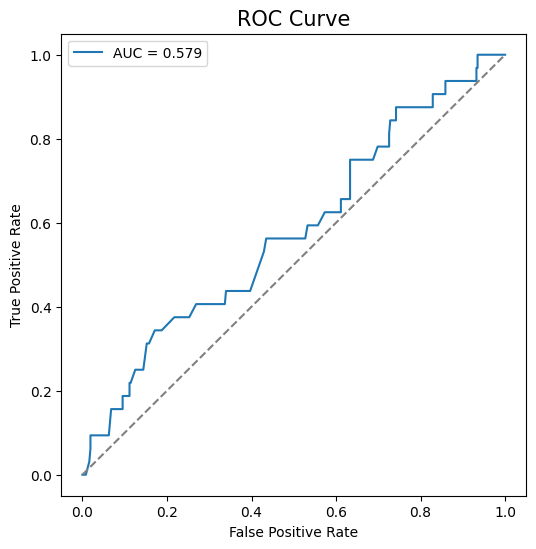

In [65]:
fpr, tpr, tr = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

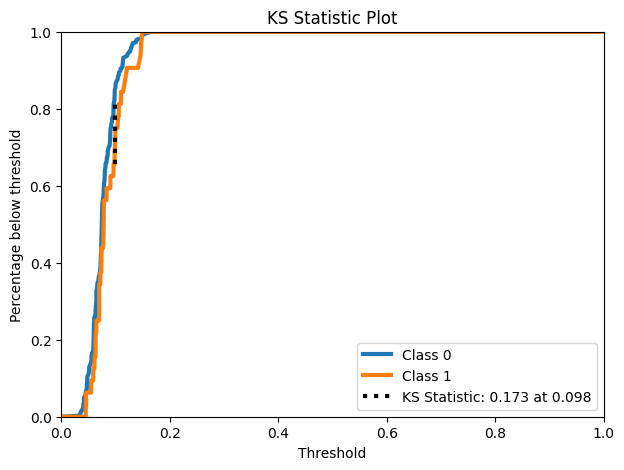

In [66]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

#### Convert to Score 

In [67]:
result_coef

const                                -0.7793
NAME_CONTRACT_TYPE_Cash loans        -0.3971
NAME_CONTRACT_TYPE_Revolving loans   -0.3822
CODE_GENDER_F                        -0.7757
CODE_GENDER_M                        -0.0035
FLAG_OWN_CAR_N                       -0.0115
FLAG_OWN_CAR_Y                       -0.7678
AMT_INCOME_TOTAL_0_100k              -0.0406
AMT_INCOME_TOTAL_100k_150k            0.2729
AMT_INCOME_TOTAL_150k_200k            0.1903
AMT_INCOME_TOTAL_200k_250k           -0.3109
AMT_INCOME_TOTAL_250k_300k           -0.9072
AMT_INCOME_TOTAL_>_300k               0.0162
AMT_CREDIT_0_200k                    -0.1276
AMT_CREDIT_200k_400k                  0.4288
AMT_CREDIT_400k_600k                  0.0650
AMT_CREDIT_600k_800k                 -0.3625
AMT_CREDIT_800k_1m                   -0.4051
AMT_CREDIT_1m                        -0.3779
AMT_ANNUITY_20k                      -0.3699
AMT_ANNUITY_30k                      -0.1999
AMT_ANNUITY_46k                      -0.1572
AMT_ANNUIT

Formula convert to Score

$$
\sum_{j, i=1}^{k, n} (-(woe_j * \beta_i + \frac{a}{n})*\text{factor} + \frac{\text{offset}}{n})
$$

Ada dua cara:
1. Kita input data manual buat coef dan WOE
2. Dibuat otomasi, but how???

Untuk value PDO, Base Score, dan Odds nya sudah ditentuin darisana nya

In [68]:
PDO = 20
BASE_SCORE = 600
ODDS = 50


FACTOR = PDO / np.log(2)
OFFSET = BASE_SCORE - (FACTOR * np.log(ODDS))

In [69]:
# Cash Loans Point
-(0.685094 * -0.3971 + (-0.7793 / 27)) * FACTOR + OFFSET/27 

26.724124669409232